In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
url=r"https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv"

In [3]:
#downloading and exploring the dataset
#shaping the data set')
df=pd.read_csv(url)

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##Comment :
1. We have 7043 Rows and 21 Columns in this Telecom Dataset.
2. We have target Variable 'Churn' with object datatype, leading this to classification problem.
3. There is interesting entry here under object datatype which is 'TotalCharges'. This feature is numerical in nature but categories as Object datatypes. This implies that there is presence of string variable in this column or might be data error.
4. 'SeniorCitizen' is categorical variable listed as Numerical variable. So we gone convert it into object datatype.
5. At end we have 3 Numerical variable and 18 categorical variable. Out of which 'CustomerID' is unnecessary variable from our analytical & modelling viewpoint. We will drop 'CustomerID' column.


In [9]:
#We are going to Group Variable into Numerical and Categorical variables list in order to simplify further analysis. Next thing is droping CustomerID Column.
df.drop(['customerID'],axis=1,inplace=True)

In [10]:
# spliting into Numerical & Categorical 
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']


# Statistical Analysis
Before Going for Statistical exploration of data, first check integrity of data & Missing value

Data Integrity Check
Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.



In [11]:
df.duplicated().sum() 

22

In [12]:
# Let drop duplicated entry from dataset.

df.drop_duplicates(keep='last',inplace= True)

In [14]:
#rechecking
df.shape

(7021, 20)

In [ ]:
#Now check for any whitespaces, NA,'-' in dataset.
#We might find something in TotalCharges column by considering Object datatype .


In [15]:
df.isin([' ','NA','?','-']).sum()



gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
#whitespaces in TotalCharges column. lets deal with it.
df['TotalCharges'].isin([' ']).sum().any()

True

In [17]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)
# Replaceing Whitespaces with null values


In [18]:
# Converting object datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

#We can impute missing value in TotalCharges either with mean and median. We can decide imputation method after checking distribution and Outliers in data


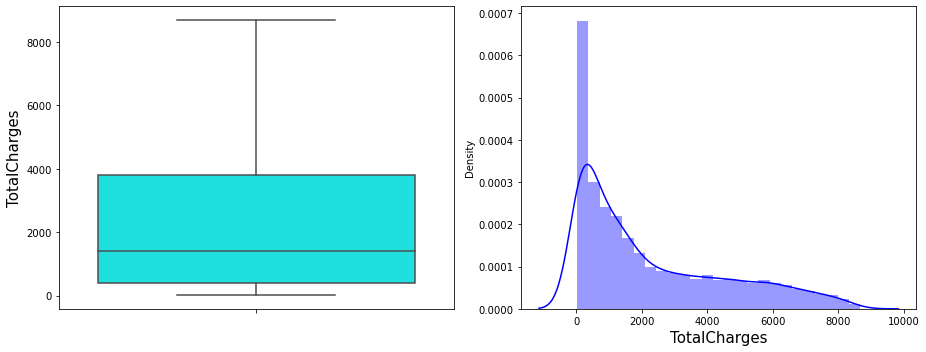

In [19]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()


#Observation:
We can see that Outliers doesnot exist, so no mean sensitivity issue present here.
Distribution plot shows that Total Charges feature is right skewed.

In [20]:
##Considering above observation we can impute Missing value with Mean.

#Imputation of Missing value in TotalCharges with Mean

In [21]:
df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [22]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
### Hence , no null value is pesent in the dta, we can procee further

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.00,0.00,0.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2290.353388,2265.044136,18.80,411.15,1410.25,3801.7,8684.80


In [ ]:
#Further ,lets compare the various independent variable with the target variable

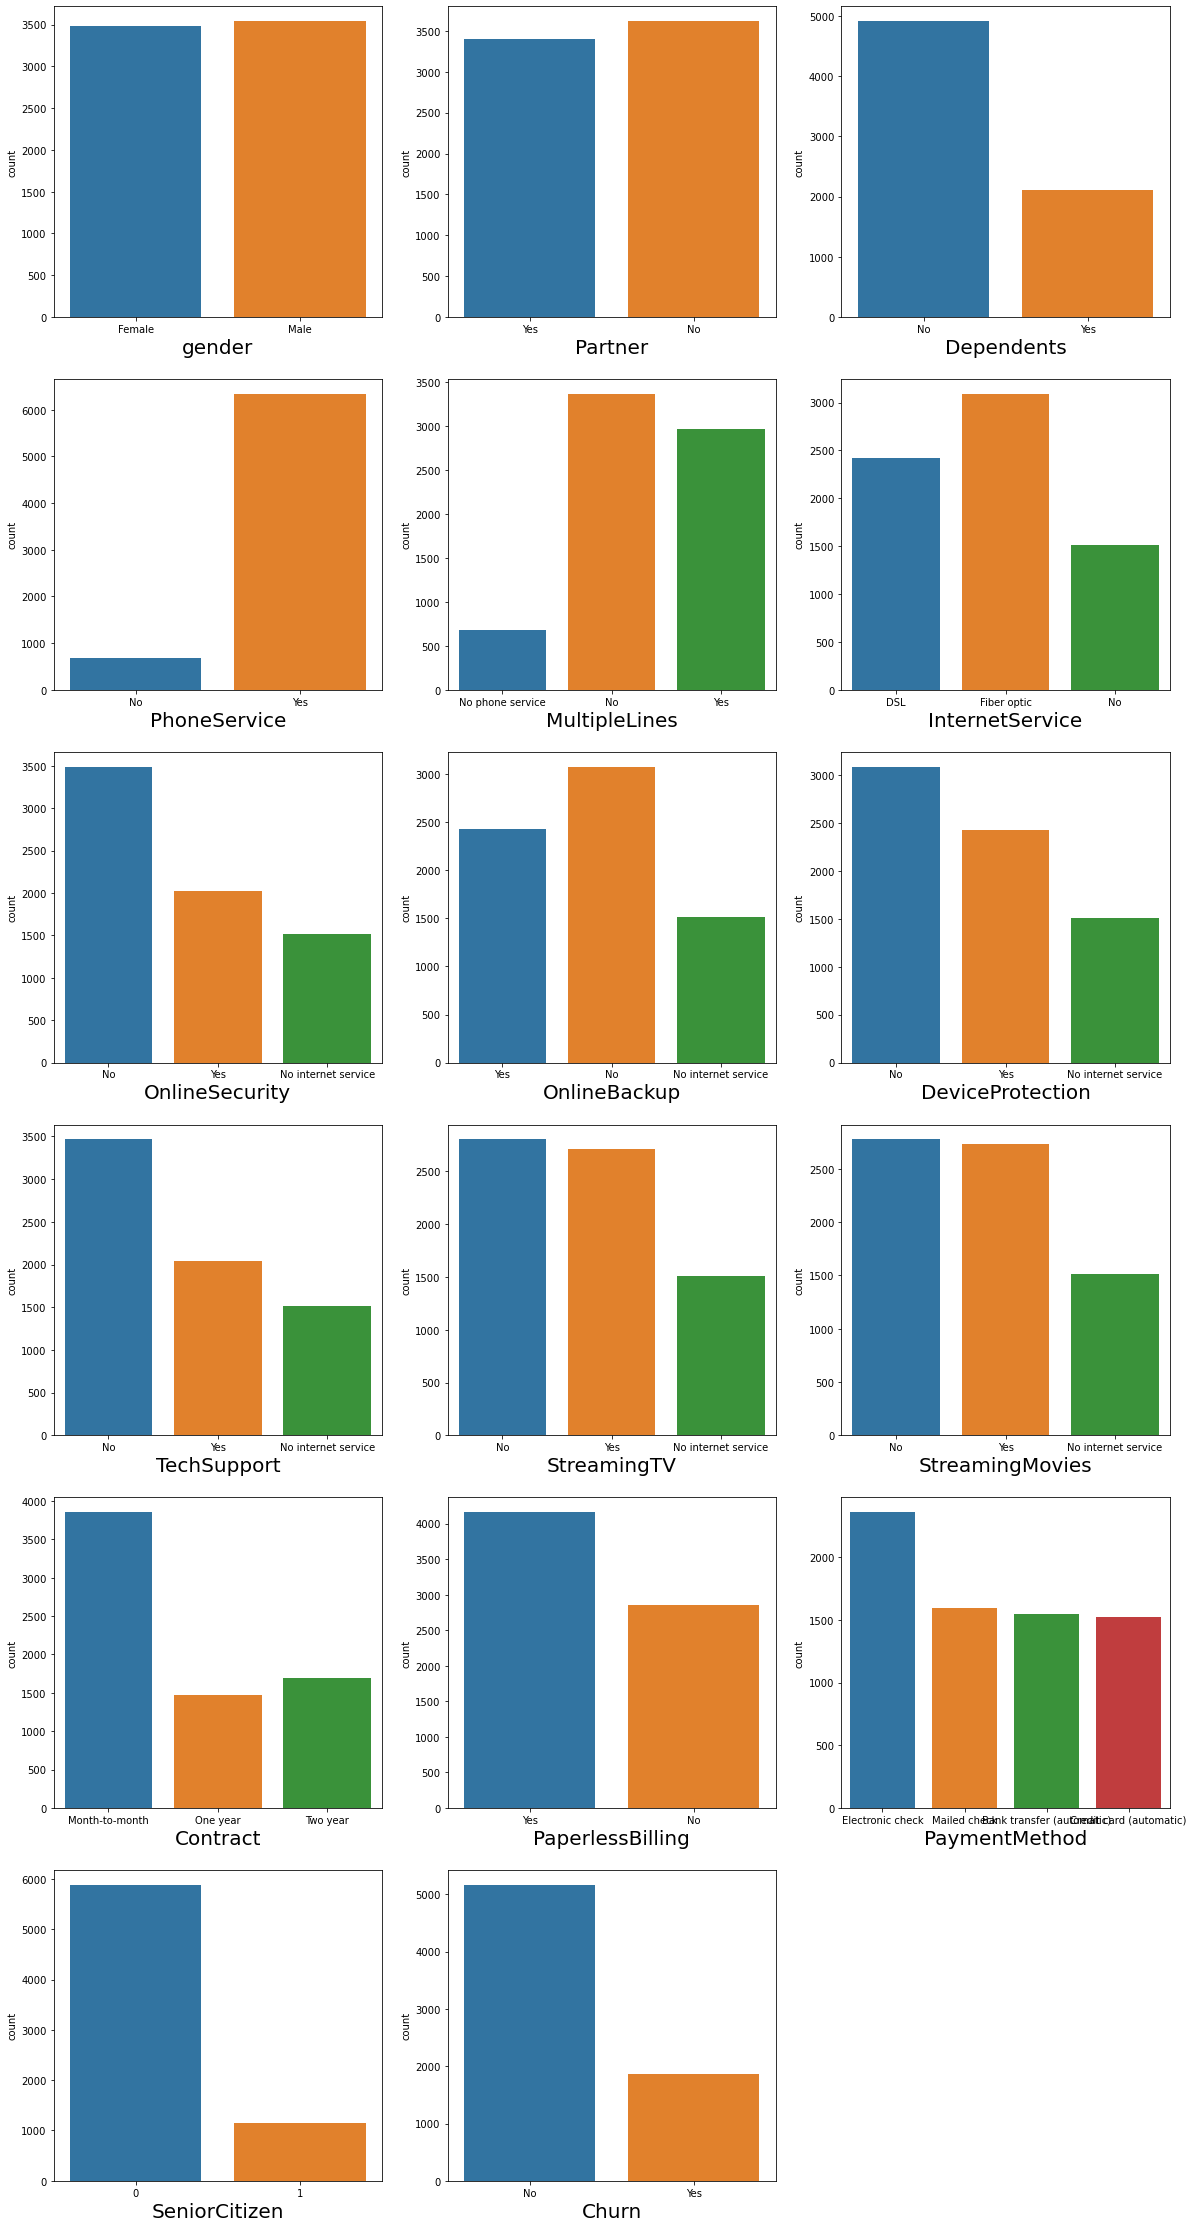

In [28]:
plt.figure(figsize=(20,40))
plotnumber =1
for i in Categorical:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [29]:
#this gives us estimated count of all the variables ..now lets compare them

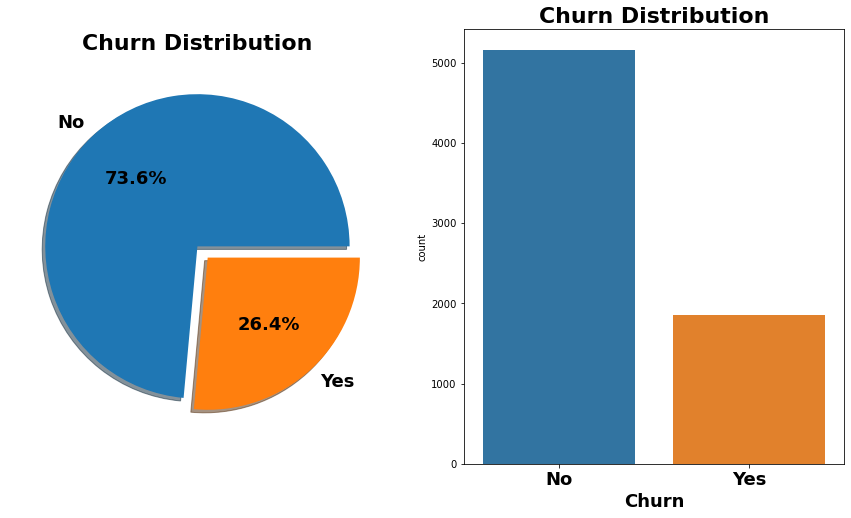

In [40]:
#Target Variable Churn
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()


#Comment :
26.4 % Customer choose to churn service in last month. Which is quite high number.
This all leads to imbalanced data case as churn is our target variable.

In [ ]:
#Gender vs Churn :

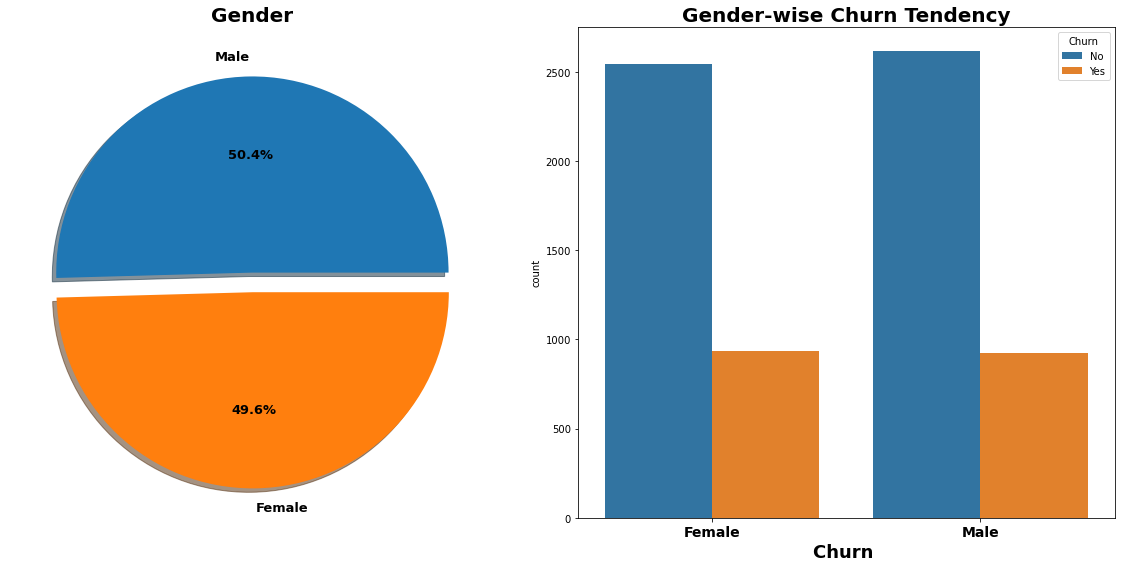

In [41]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [42]:
pd.crosstab(df['gender'],df["Churn"],margins=True)

Churn,No,Yes,All
gender,,,
Female,2546,934,3480
Male,2618,923,3541
All,5164,1857,7021


In [ ]:
#Comment :
1. Data contain both gender almost in same proportion with minor difference.
2. Both gender have tendency of attrition in same percentage.

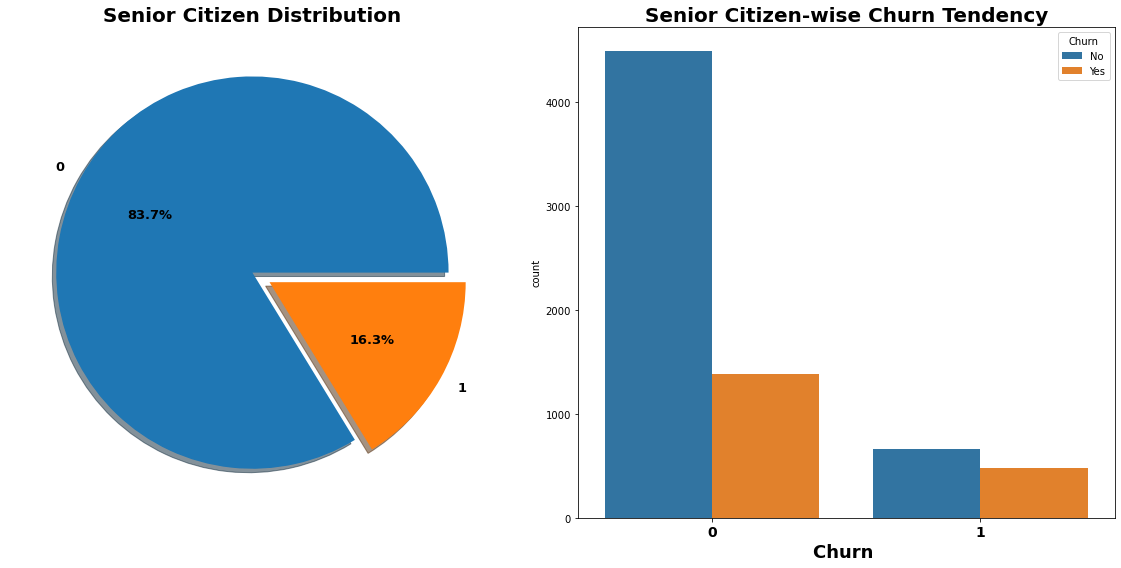

In [43]:
#Senior Citizen vs Gender Wise Churn Tendency
# Lets see how many of them are Senior Citizen and Churn tendency in senior citizen

f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


#There are only 16.3 % of the customers who are senior citizens. Thus most of our customers in the data are younger people.

In [44]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True)


Churn                   No   Yes   All
gender SeniorCitizen                  
Female 0              2218   695  2913
       1               328   239   567
Male   0              2280   687  2967
       1               338   236   574
All                   5164  1857  7021

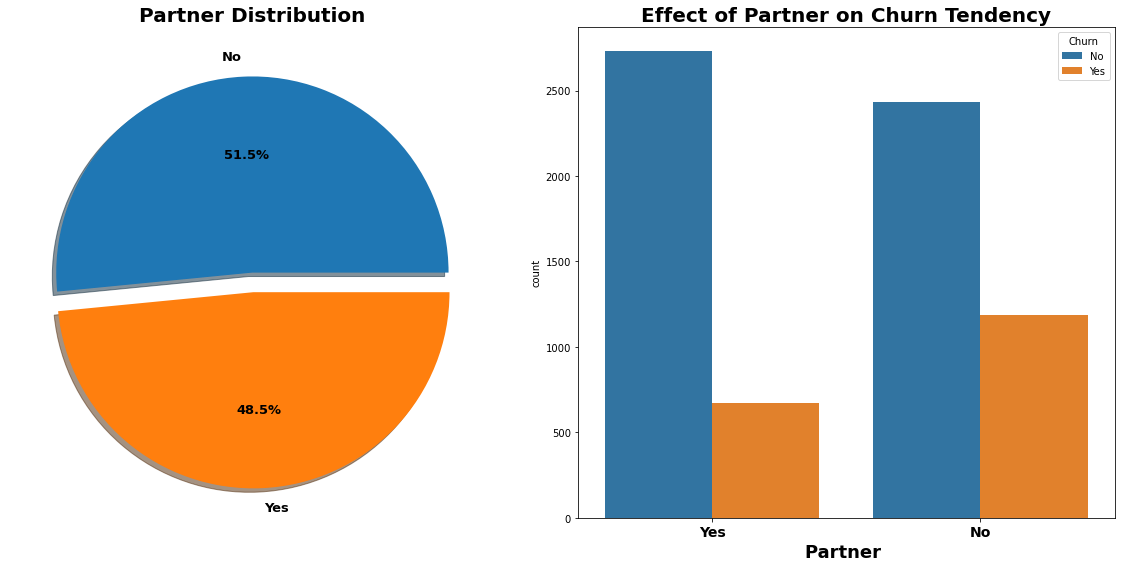

In [45]:
## Around 16% customer are Senior citizen and form countplot we can see they have more tendency to churn.

#Effect of Partner and Dependents on Churn
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Partner on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


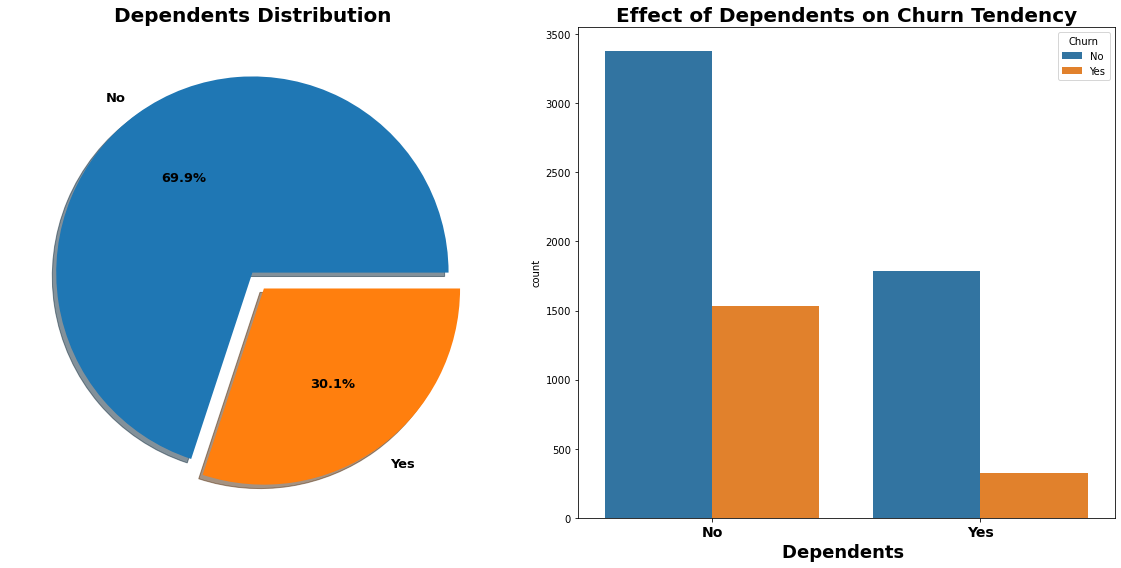

In [46]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


#Observation-
1. Customer having Partner have less tendency to Churn.
2. Almost 30% Customer have dependents on them and they also have less tendency to churn compare to remaining 70%

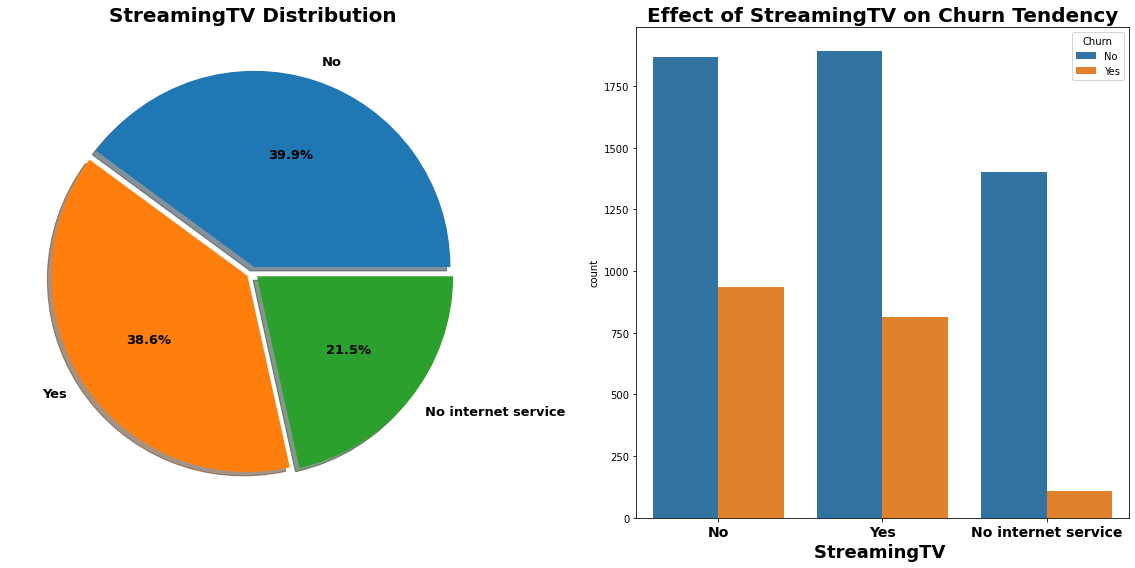

In [47]:
#StreamingTV Distribution
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingTV ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

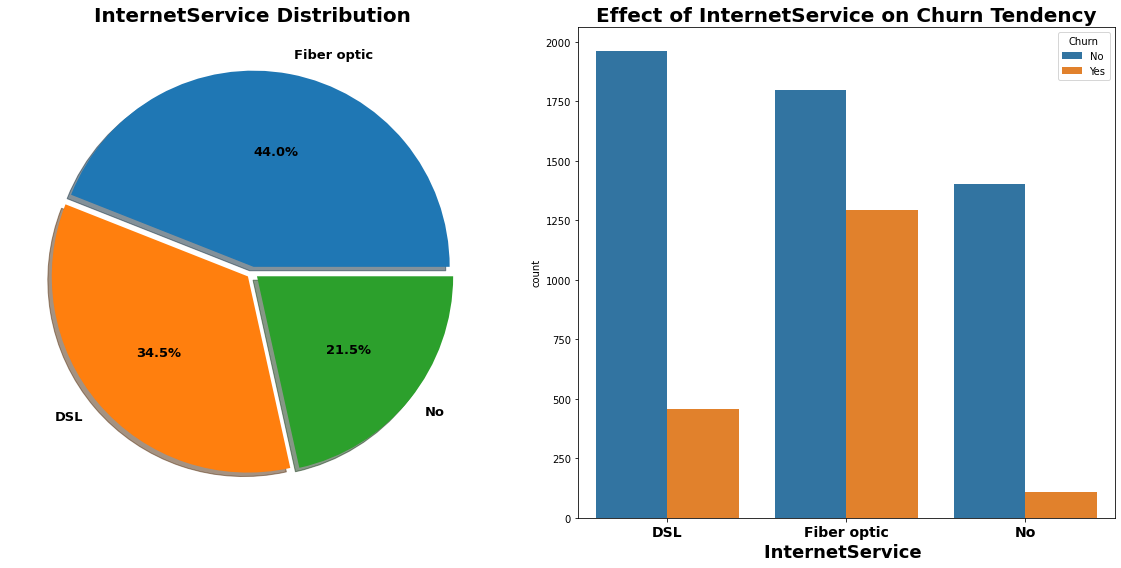

In [48]:
#InternetService Distribution
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("InternetService ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None

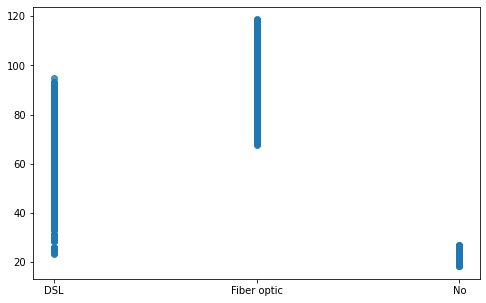

In [55]:
plt.figure(figsize=(8,5))
sns.regplot(x='InternetService', y='MonthlyCharges',data=df)
plt.show()

#comment 


we can find high monthly charges among customer using fiber optic compare to DSL.
We can conclude that High charges is reason of customer churn.




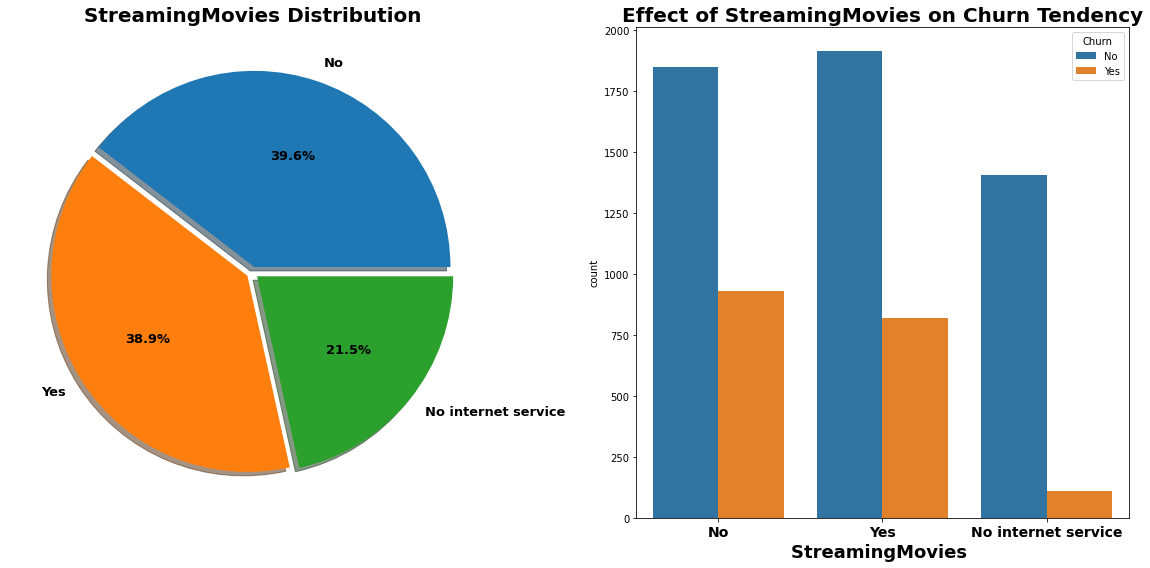

In [51]:
#StreamingMovies Distribution
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingMovies ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [ ]:
#Almost same churn tendency in people streaming movies and not.

##Contract Distribution  

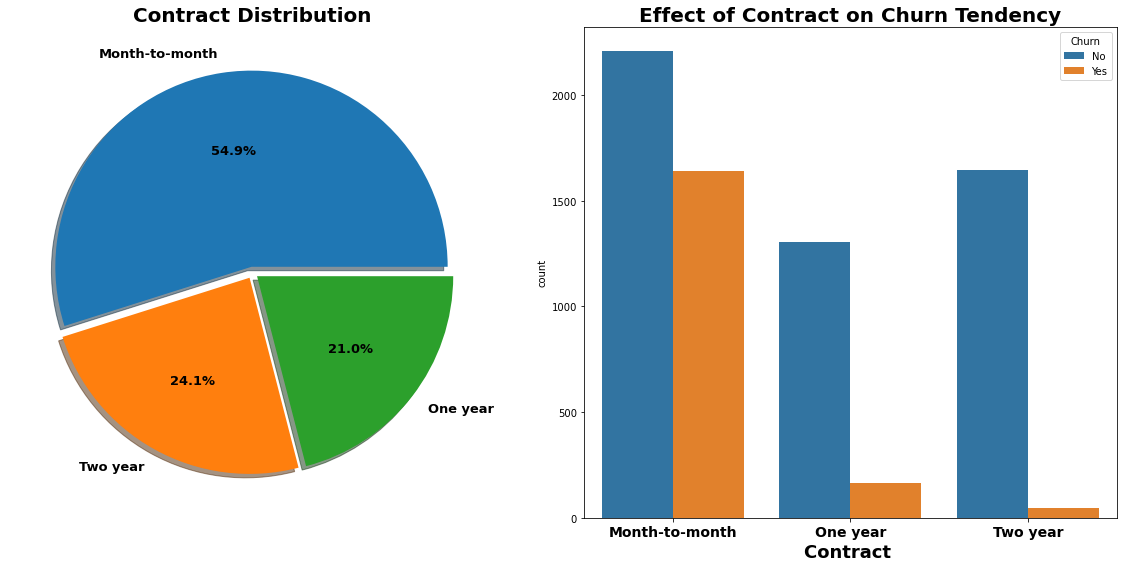

In [52]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

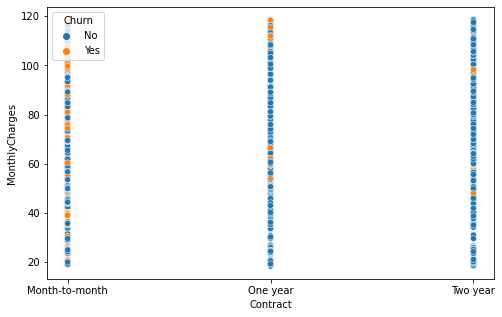

In [56]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

# Comments:
Almost 55% customer perfer month to month contract compare to other.We also find high churn rate in these customer.

We did not find any relation between Monthly charges and contract tenure.

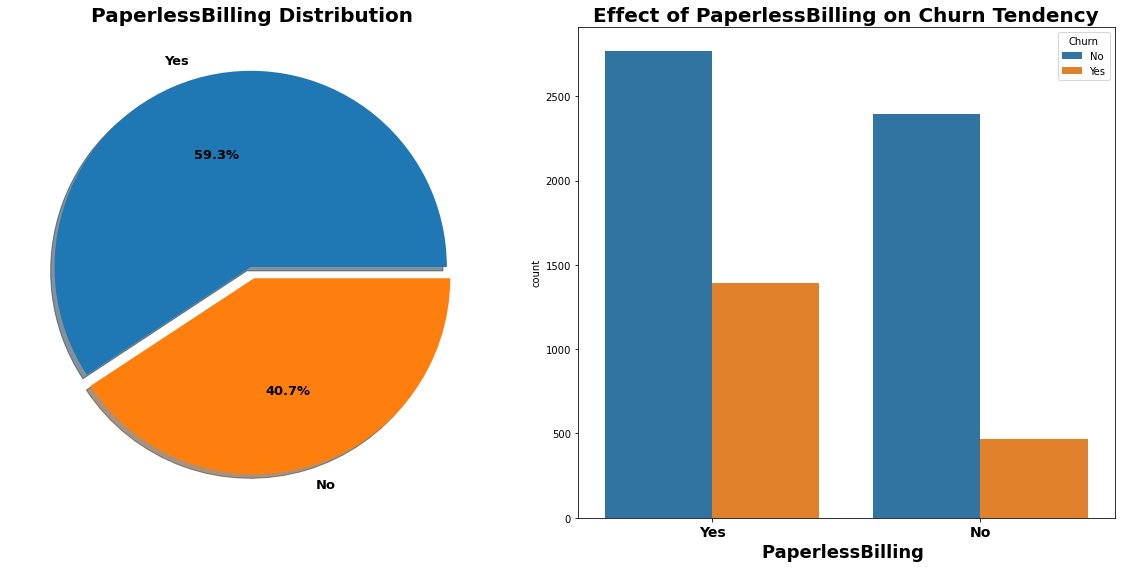

In [57]:
#  PaperlessBilling Distribution
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


## comments
1. 60% Customer perfer paperless billing.

2. The customers who prefer paperless billing they have high churn rate.

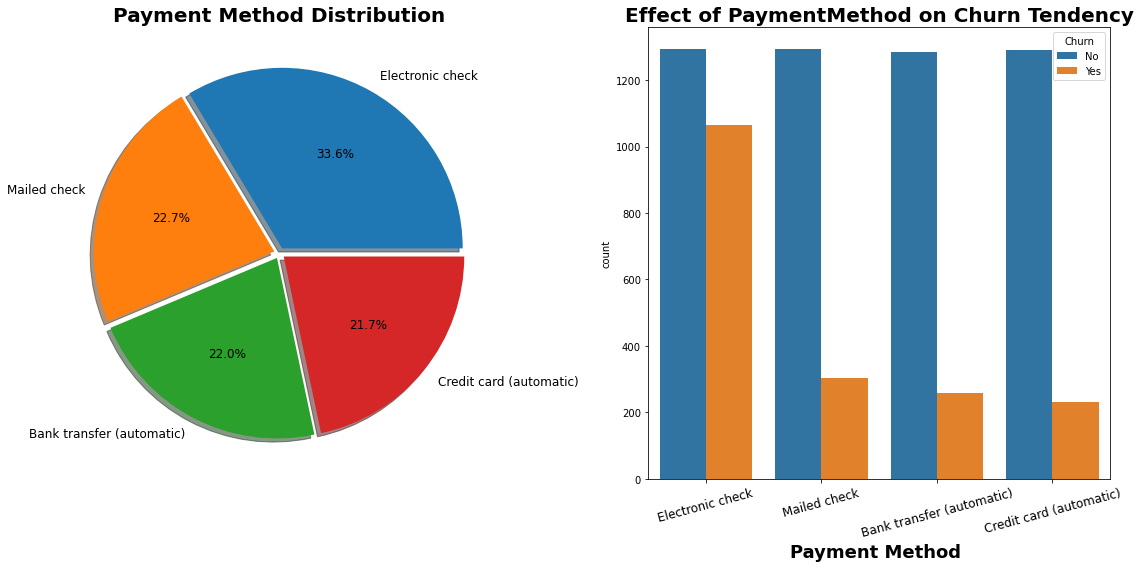

In [58]:
# Payment Method Distribution
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

In [59]:
#We can see high Attrition tendency in customer who pay by Electronic check

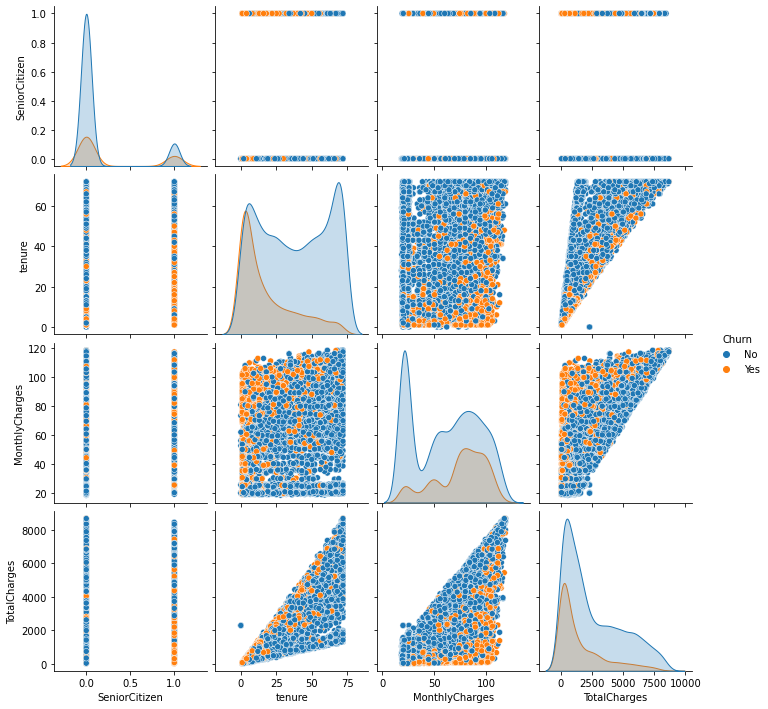

In [61]:
sns.pairplot(df,hue="Churn")
plt.show()


## Encoding categorical data


In [62]:
Numerical =['tenure','MonthlyCharges', 'TotalCharges']
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [65]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Feature selection and Engineering

#1. 1. Outliers Detection and Removal

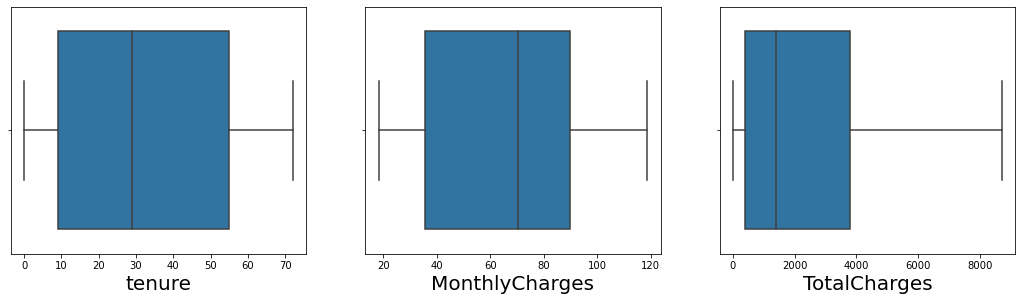

In [67]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [68]:
#we can see No outliers exist dataset.

In [69]:
df.drop(['PhoneService'],axis=1,inplace=True)

# 2. Skewness of features

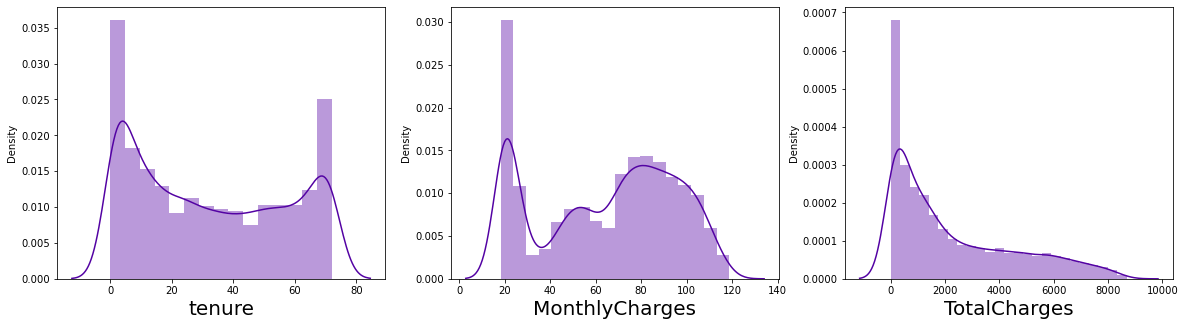

In [70]:
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


In [71]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959073
Churn               1.068139
dtype: float64

In [72]:
#tenure','MonthlyCharges', 'TotalCharges' are continous numerical feature in dataset.

#Out of which TotalCharges is skewed in nature. Which we gone transform here.



In [73]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [74]:
#we will try to remove the skweness in data
from sklearn.preprocessing import PowerTransformer
pw=PowerTransformer()
X= pw.fit_transform(X)

## 3. Corrleation|


In [75]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.005939,-0.001762,-0.015262,-0.012182,0.000449,-0.007045,-0.006461,-0.008781,0.000811,-0.011350,0.016304,-0.013158,0.000878,-0.008763
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.145521,-0.031221,-0.128267,-0.013675,-0.021448,-0.151349,0.030704,0.047209,-0.143624,0.156196,-0.037320,0.219434,0.101626,0.151619
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.139827,0.003667,0.150589,0.152518,0.165752,0.126422,0.136443,0.128635,0.293042,-0.015776,-0.152069,0.094301,0.316762,-0.149135
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.027083,0.046608,0.151984,0.090502,0.080015,0.133303,0.046140,0.020525,0.241912,-0.112220,-0.038185,-0.116191,0.062648,-0.163459
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.340458,-0.026847,0.325762,0.370824,0.371062,0.323197,0.288737,0.296225,0.670728,0.005053,-0.367827,0.245251,0.824158,-0.351508
MultipleLines,-0.005939,0.145521,0.139827,-0.027083,0.340458,1.000000,-0.106819,0.006599,0.116625,0.121633,0.010909,0.174225,0.180113,0.108553,0.164814,-0.174073,0.432246,0.451191,0.040175
InternetService,-0.001762,-0.031221,0.003667,0.046608,-0.026847,-0.106819,1.000000,-0.029421,0.035736,0.044563,-0.027019,0.107508,0.098435,0.102456,-0.137056,0.082669,-0.320525,-0.173279,-0.047366
OnlineSecurity,-0.015262,-0.128267,0.150589,0.151984,0.325762,0.006599,-0.029421,1.000000,0.184211,0.175061,0.284255,0.043553,0.054847,0.374556,-0.157024,-0.096968,-0.053347,0.254301,-0.288505
OnlineBackup,-0.012182,-0.013675,0.152518,0.090502,0.370824,0.116625,0.035736,0.184211,1.000000,0.186760,0.194841,0.146071,0.135587,0.280658,-0.012565,-0.124724,0.120391,0.375235,-0.194214
DeviceProtection,0.000449,-0.021448,0.165752,0.080015,0.371062,0.121633,0.044563,0.175061,0.186760,1.000000,0.239738,0.275710,0.287869,0.350077,-0.037485,-0.135664,0.164399,0.388772,-0.176770


<AxesSubplot:>

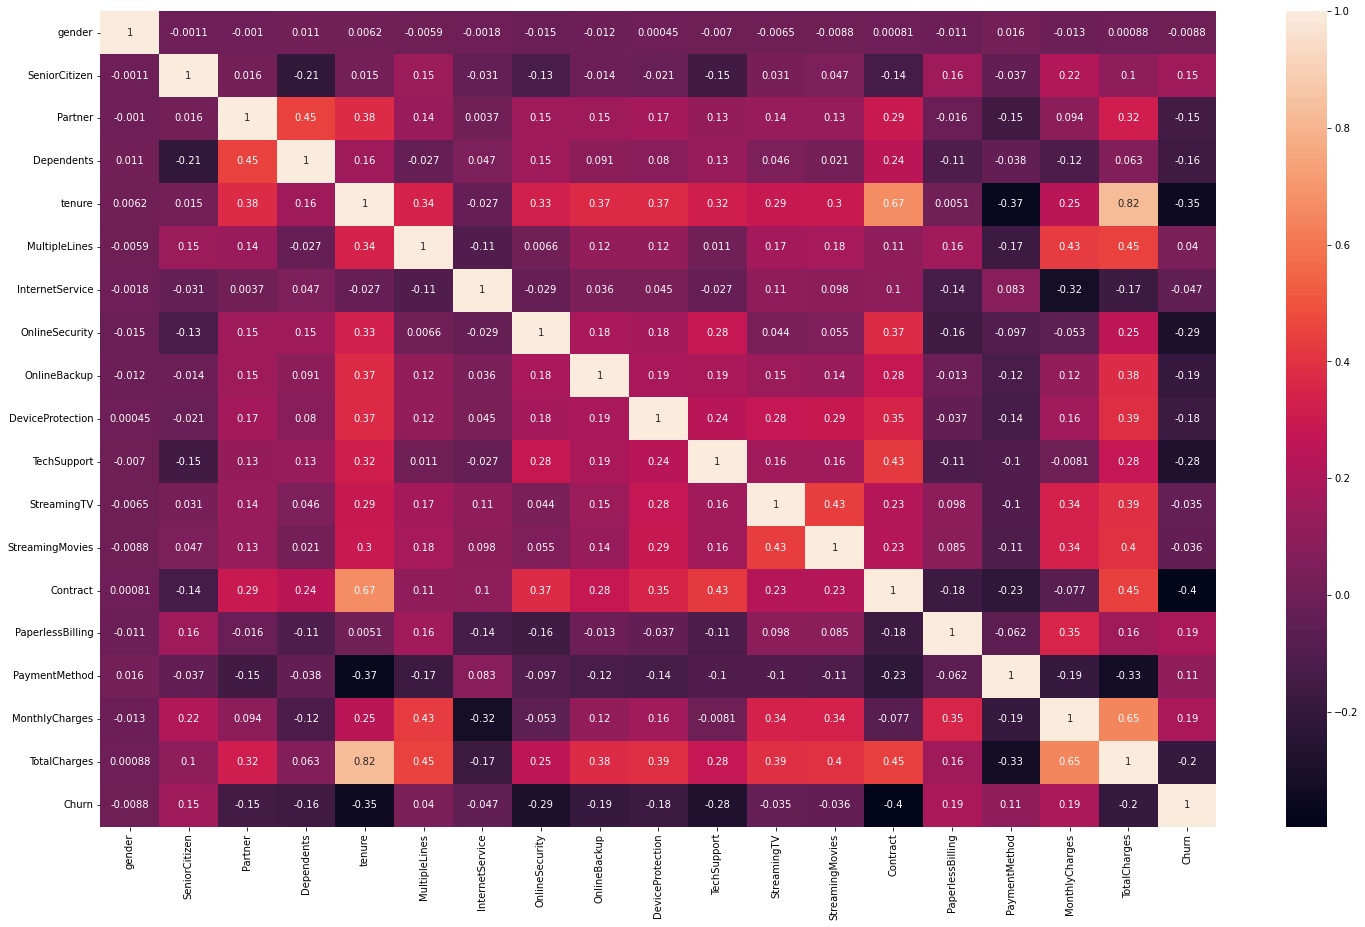

In [77]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

In [83]:
#4. Balanceing Imbalanced target feature
df.Churn.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

In [ ]:
#As Target variable data is Imbalanced in nature we will need to balance target variable.

##
#Balancing using SMOTE

In [80]:
pip install imbalanced-learn

     |████████████████████████████████| 226 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 8.7 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [81]:
import imblearn

In [82]:
from imblearn.over_sampling import SMOTE

In [84]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [85]:
Y.value_counts()

0    5164
1    5164
Name: Churn, dtype: int64

## now we are good to go
#We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

In [86]:
##Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)


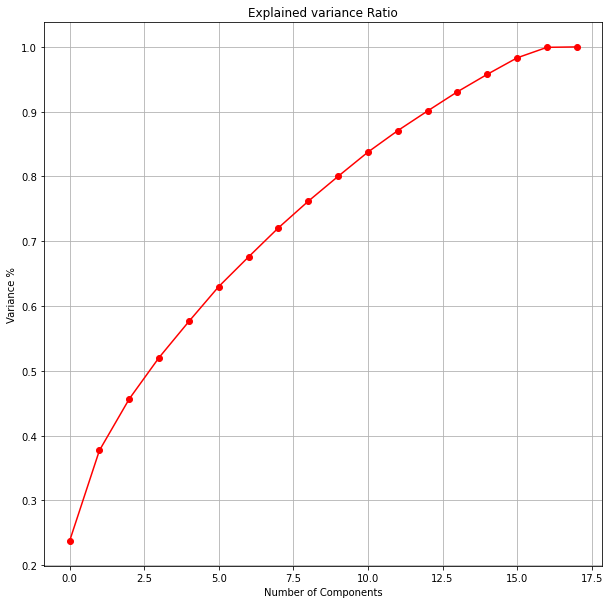

In [87]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [88]:
##Comment -
#AS per the graph, we can see that 13 principal components attribute for 90% of variation in the data. We shall pick the first 13 components for our prediction.

pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)

In [89]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

In [90]:
#Machine Learning Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)

In [92]:
#finding best Random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7950951919974185 on Random_state 147


In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=90, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7705711519845111


Confusion matrix of Logistics Regression : 
 [[1211  390]
 [ 321 1177]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1601
           1       0.75      0.79      0.77      1498

    accuracy                           0.77      3099
   macro avg       0.77      0.77      0.77      3099
weighted avg       0.77      0.77      0.77      3099



In [94]:
#Applying other classification algorithm
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7705711519845111


Confusion matrix : 
 [[1211  390]
 [ 321 1177]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1601
           1       0.75      0.79      0.77      1498

    accuracy                           0.77      3099
   macro avg       0.77      0.77      0.77      3099
weighted avg       0.77      0.77      0.77      3099



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8044530493707648


Confusion matrix : 
 [[1216  385]
 [ 221 1277]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      1601
           1       0.77      0.85      0.81      1498

    accuracy                           0.80      3099
   macro avg       0.81      0.81      0.80      3099
weighted avg       0.81      0.80      0

In [95]:
##CrossValidation :
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')




Cross Validation Score LogisticRegression() :

Score : [0.7642788  0.75992256 0.77153921 0.77336562 0.77966102]
Mean Score : 0.7697534391708019
Std deviation : 0.006942835759739192




Cross Validation Score SVC() :

Score : [0.78557599 0.7749274  0.80300097 0.81113801 0.82276029]
Mean Score : 0.7994805322657392
Std deviation : 0.017241985057051757




Cross Validation Score GaussianNB() :

Score : [0.75266215 0.73959342 0.76911907 0.768523   0.78353511]
Mean Score : 0.7626865496719633
Std deviation : 0.015125378041806017




Cross Validation Score DecisionTreeClassifier() :

Score : [0.74491772 0.76766699 0.78944821 0.77288136 0.7874092 ]
Mean Score : 0.7724646941487803
Std deviation : 0.016086054091425904




Cross Validation Score KNeighborsClassifier(n_neighbors=18) :

Score : [0.7768635  0.77250726 0.79332043 0.79806295 0.80726392]
Mean Score : 0.7896036134439994
Std deviation : 0.01305264203954355




Cross Validation Score RandomForestClassifier() :

Score : [0.80832527 0.8131

In [96]:
##Hyper Parameter Tuning : GridSearchCV
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.793 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.786 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.817 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.813 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [97]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 70}

## Final Model

In [99]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 70, max_depth=60 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8357534688609228


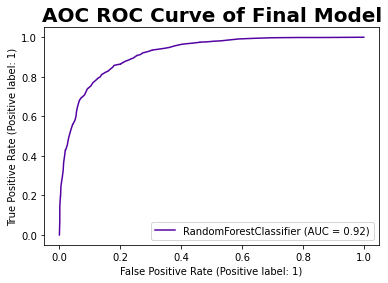

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   

plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()


In [101]:
#Saving model
import joblib
joblib.dump(Final_mod,'Customer_Churn_Final.pkl')


['Customer_Churn_Final.pkl']